In [2]:
from Bio import AlignIO
from Bio import Phylo
from Bio.Phylo.TreeConstruction import DistanceCalculator
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor

import matplotlib
import matplotlib.pyplot as plt

In [14]:
#Usando a ferramente Clustal Omega, é possível fazer o alinhamento das sequências
#proteicas.
with open("clustal_omega_CTNNA3.aln","r") as aln: 
    alignment = AlignIO.read(aln,"clustal")
print(type(alignment))

<class 'Bio.Align.MultipleSeqAlignment'>


In [15]:
# utilizando o modelo identity do DistanceCalculator:
calculator = DistanceCalculator('identity')

# calcula-se a matriz de distâncias entre as sequências dos organismos através do alinhamento múltiplo utilizado e obtido do Clustal Omega:
distance_matrix = calculator.get_distance(alignment)

print(distance_matrix)

[Marmota_marmota_marmota]	0
[Marmota_flaviventris]	0.002008032128514081	0
[Lemur_catta]	0.032128514056224855	0.033132530120481896	0
[Microcebus_murinus]	0.028112449799196804	0.029116465863453844	0.007028112449799173	0
[Piliocolobus_tephrosceles]	0.03614457831325302	0.03614457831325302	0.028112449799196804	0.029116465863453844	0
[Rhinopithecus_roxellana]	0.034136546184738936	0.03514056224899598	0.025100401606425682	0.026104417670682722	0.005020080321285092	0
[Chlorocebus_sabaeus]	0.033132530120481896	0.034136546184738936	0.02409638554216864	0.025100401606425682	0.004016064257028162	0.0010040160642570406	0
[Trachypithecus_francoisi]	0.034136546184738936	0.03514056224899598	0.0230923694779116	0.026104417670682722	0.005020080321285092	0.002008032128514081	0.0010040160642570406	0
[Macaca_nemestrina]	0.034136546184738936	0.03514056224899598	0.026104417670682722	0.027108433734939763	0.005020080321285092	0.003012048192771122	0.002008032128514081	0.003012048192771122	0
[Papio_anubis]	0.03714859

In [16]:
# utilizando o calculator criado anteriormente para o constructor da árvore:
constructor = DistanceTreeConstructor(calculator)

# constrói-se a árvore filogenética resultante do alinhamento múltiplo:
tree = constructor.build_tree(alignment)
tree.rooted = True

print(tree)

Tree(rooted=True)
    Clade(branch_length=0, name='Inner35')
        Clade(branch_length=0.0001068728037148445, name='Inner33')
            Clade(branch_length=0.0011478204484605104, name='Inner29')
                Clade(branch_length=0.0007133724630665464, name='Inner28')
                    Clade(branch_length=0.00018359571096887572, name='Inner27')
                        Clade(branch_length=0.0019505103748326518, name='[Pongo_pygmaeus]')
                        Clade(branch_length=0.0020655538821954273, name='Inner26')
                            Clade(branch_length=0.001000878514056233, name='[Symphalangus_syndactylus]')
                            Clade(branch_length=3.137550200807502e-06, name='Inner25')
                                Clade(branch_length=1.214306433183765e-17, name='[Hylobates_moloch]')
                                Clade(branch_length=0.002008032128514069, name='[Nomascus_leucogenys]')
                    Clade(branch_length=0.011362589027986966, name='Inner

In [17]:
# para guardar a árvore filogenética criada num ficheiro 

Phylo.write(tree, "tree_ctnna3.xml", "phyloxml")

1

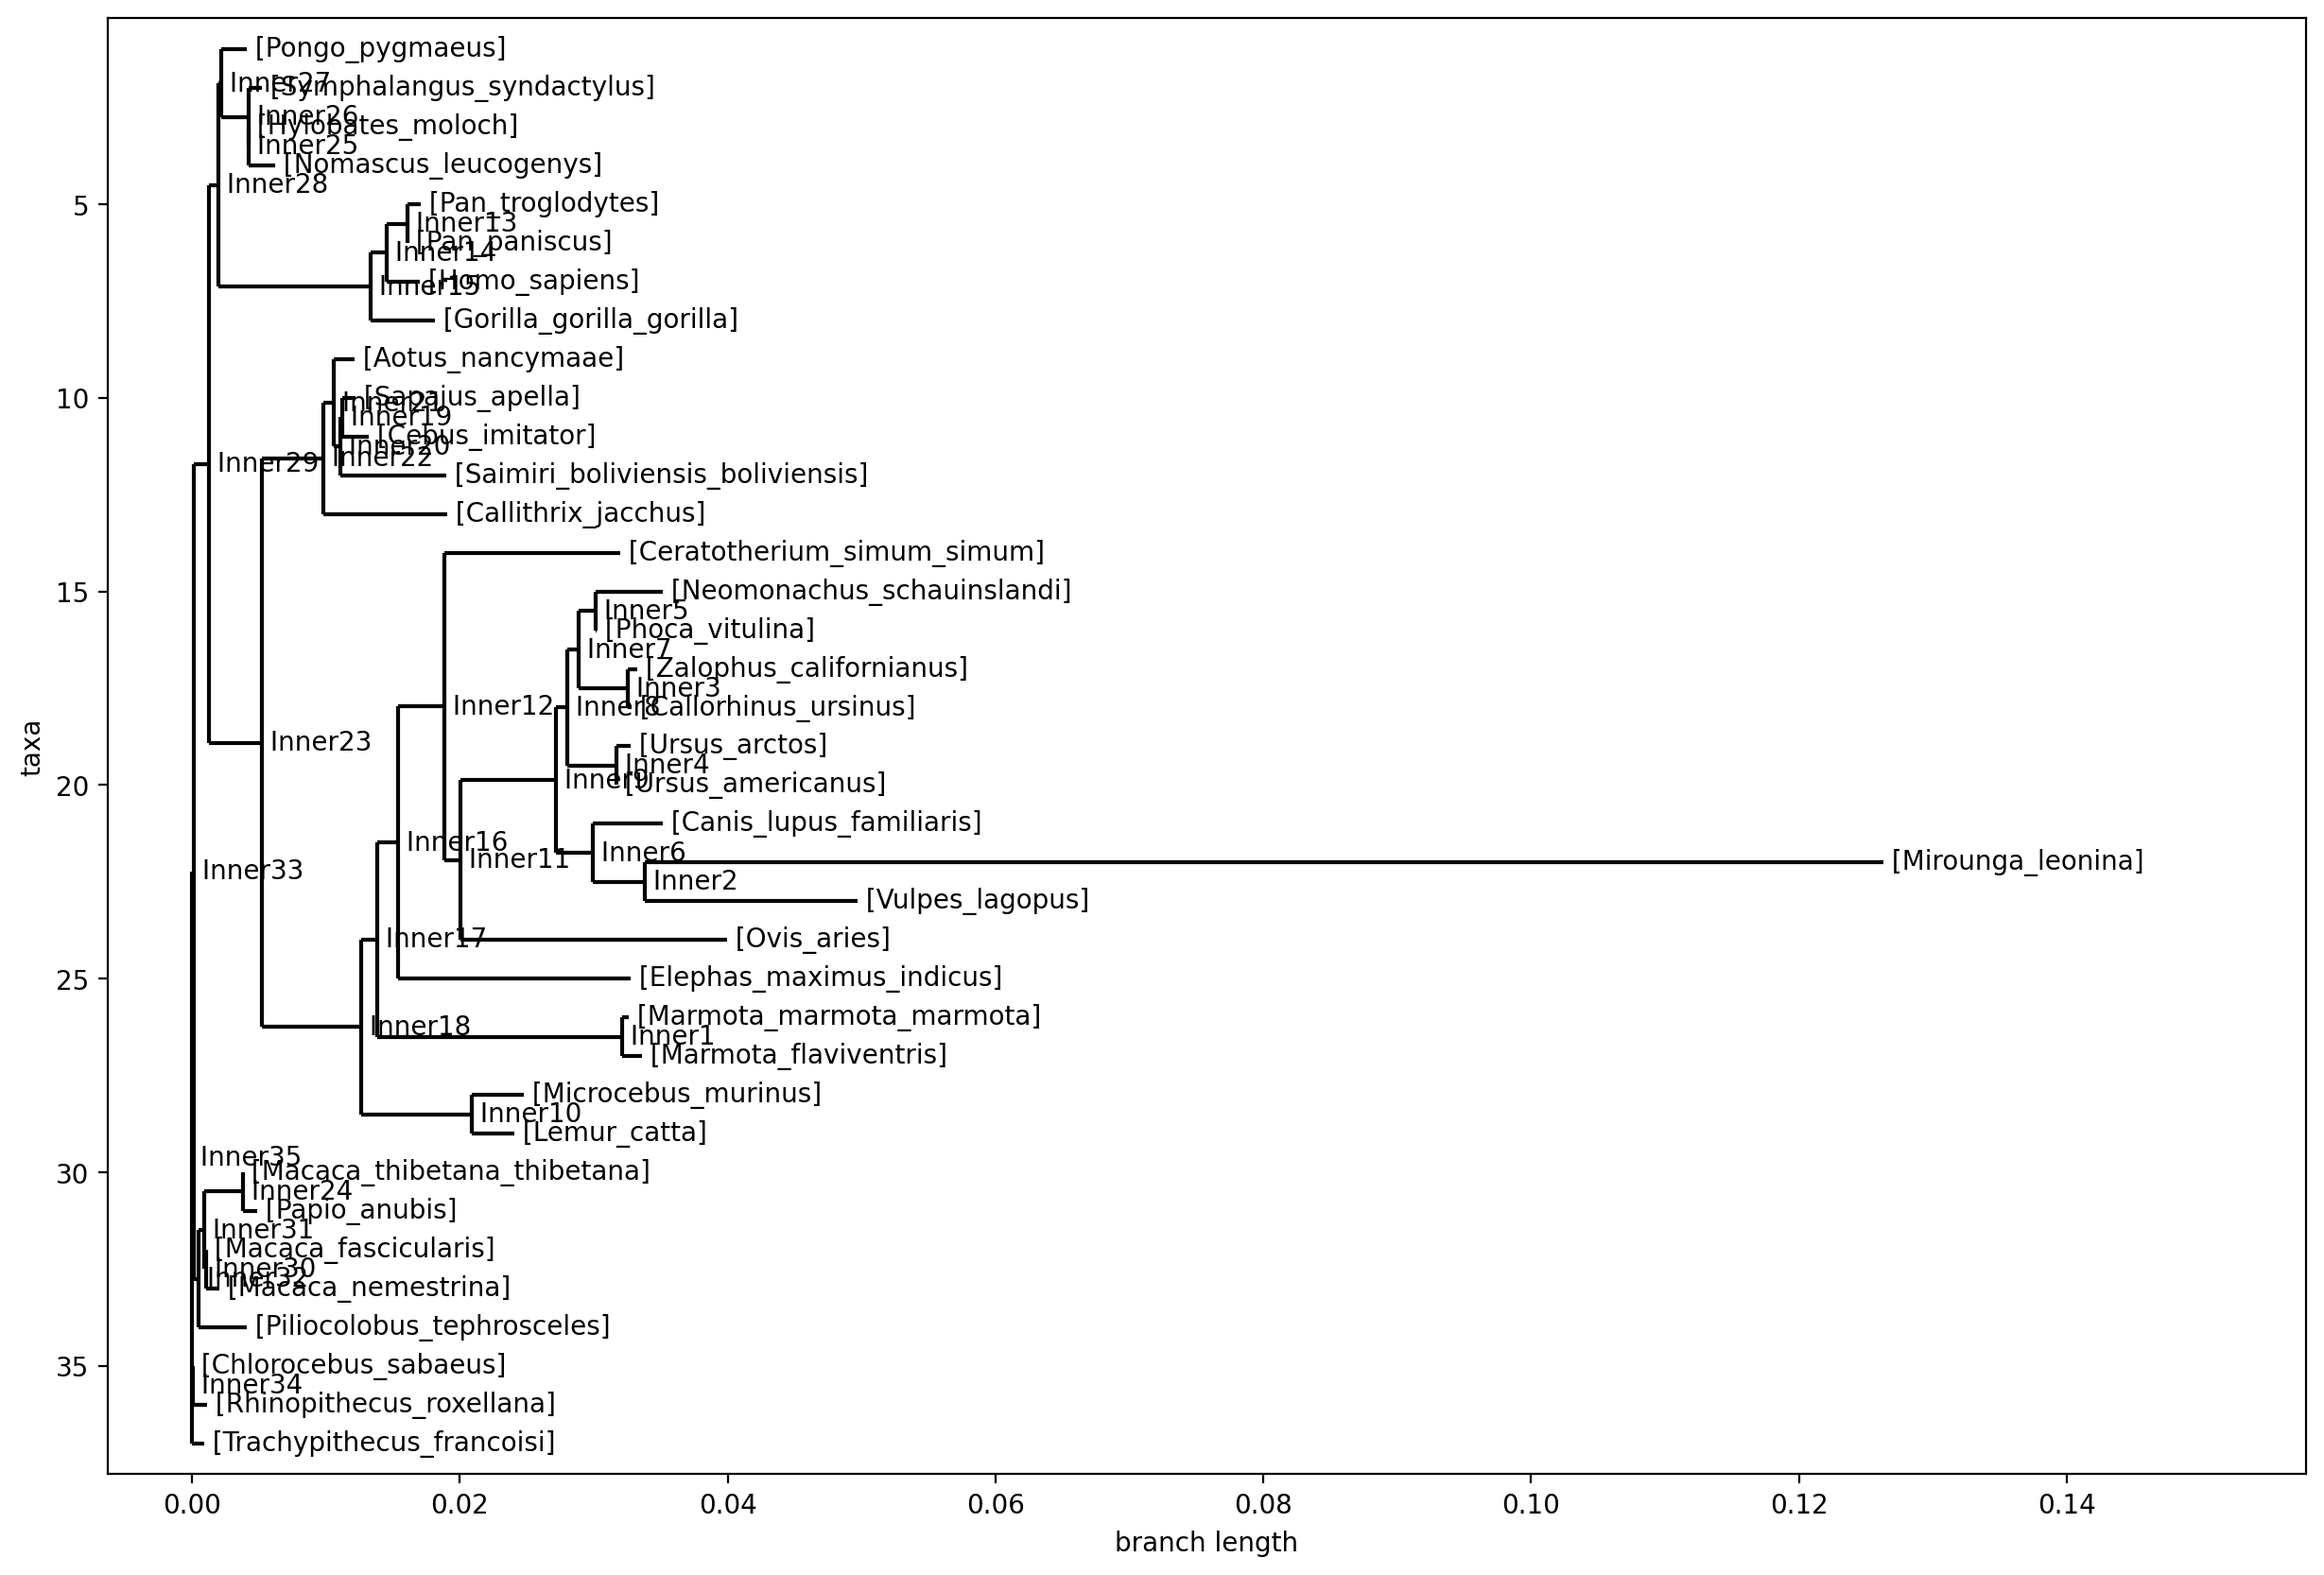

In [30]:
# para criar uma visão mais intuitiva e gráfica da árvore

fig = plt.figure(figsize=(15, 10), dpi=200)
matplotlib.rc('font', size=10)
matplotlib.rc('xtick', labelsize=10)
matplotlib.rc('ytick', labelsize=10)
axes = fig.add_subplot(1, 1, 1)
Phylo.draw(tree, axes=axes)
fig.savefig("tree_ctnna3")